<a href="https://colab.research.google.com/github/LvisRojas/cotrol/blob/main/segunda_prueba_fuzz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install scikit-fuzzy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 kB 11.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894079 sha256=55f1a0c67eb04b69eef0db29922270cdd47e0ab827f08289b57acb174e495828
  Stored in directory: /root/.cache/pip/wheels/4f/86/1b/dfd97134a2c8313e519bcebd95d3fedc7be7944db022094bc8
Successfully built scikit-fuzzy


In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

In [ ]:
#variables de entrada
dinero = ctrl.Antecedent(np.arange(0,50,1),"dinero") #en millones
salario = ctrl.Antecedent(np.arange(0,20,1),"salario") #en millones
#variables de salida
prefe = ctrl.Consequent(np.arange(0,100,1),"probabilidad de que un cliente sea preferencial")

In [ ]:
#funciones de menbresia
#entrada
dinero["bajo"]=fuzz.trimf(dinero.universe,[0,0,10])
dinero["media"]=fuzz.trimf(dinero.universe,[5,15,25])
dinero["alta"]=fuzz.trapmf(dinero.universe,[20,30,50,50])

salario["muy poco"]=fuzz.trimf(salario.universe,[0,0,3])
salario["poco"]=fuzz.trimf(salario.universe,[2,4,7])
salario["alto"]=fuzz.trimf(salario.universe,[5,9,12])
salario["muy alto"]=fuzz.trapmf(salario.universe,[10,13,20,20])

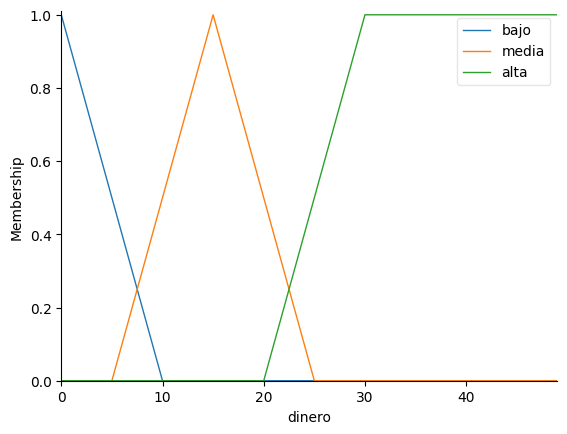

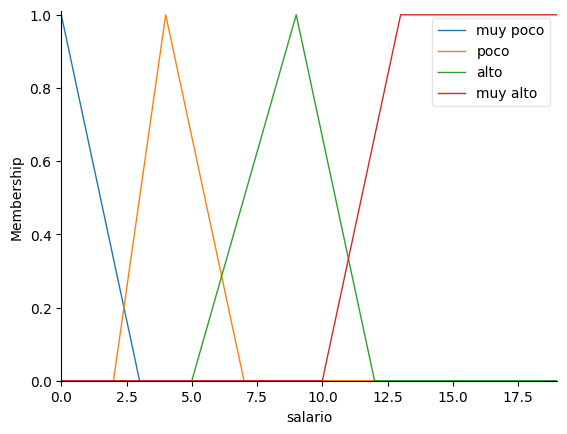

In [ ]:
dinero.view()
salario.view()

In [ ]:
#funcion de menbresia
#salida
prefe["nula"]=fuzz.trimf(prefe.universe,[0,0,55]);
prefe["posible"]=fuzz.trimf(prefe.universe,[40,60,80]);
prefe["muy posible"]=fuzz.trimf(prefe.universe,[70,100,100]);

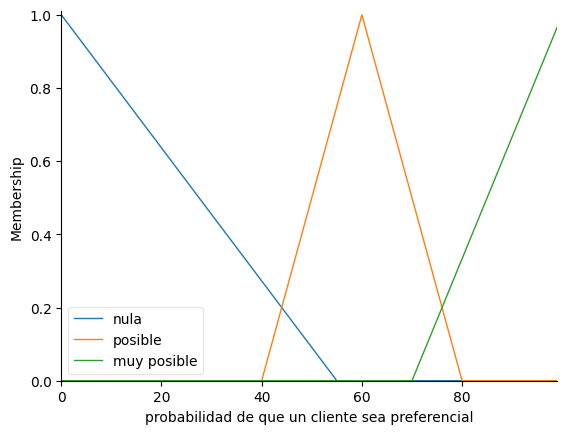

In [ ]:
prefe.view()

(<Figure size 640x480 with 1 Axes>, <Axes: >)

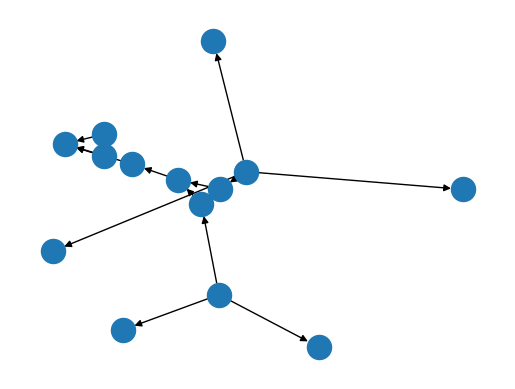

In [ ]:
# reglas difusas
regla11= ctrl.Rule(dinero["bajo"] & salario["muy poco"],prefe["nula"])
regla12= ctrl.Rule(dinero["bajo"] & salario["poco"],prefe["nula"])
regla13= ctrl.Rule(dinero["bajo"] & salario["alto"],prefe["nula"])
regla14= ctrl.Rule(dinero["bajo"] & salario["muy alto"],prefe["posible"])

regla21= ctrl.Rule(dinero["media"] & salario["muy poco"],prefe["nula"])
regla22= ctrl.Rule(dinero["media"] & salario["poco"],prefe["posible"])
regla23= ctrl.Rule(dinero["media"] & salario["alto"],prefe["posible"])
regla24= ctrl.Rule(dinero["media"] & salario["muy alto"],prefe["posible"])

regla31= ctrl.Rule(dinero["alta"] & salario["muy poco"],prefe["nula"])
regla32= ctrl.Rule(dinero["alta"] & salario["poco"],prefe["posible"])
regla33= ctrl.Rule(dinero["alta"] & salario["alto"],prefe["posible"])
regla34= ctrl.Rule(dinero["alta"] & salario["muy alto"],prefe["muy posible"])
regla34.view()

In [ ]:
sistema_control = ctrl.ControlSystem(
  [  regla11,
    regla12,
    regla13,
    regla14,
    regla21,
    regla22,
    regla23,
    regla24,
    regla31,
    regla32,
    regla33,
    regla34]
)
con = ctrl.ControlSystemSimulation(sistema_control)

In [ ]:
#si tiene 500 M ahorrados y 15M de salario
con.input['dinero']=20
con.input["salario"]=8
con.compute()

con.output[prefe']

KeyError: ignored